Mean Squared Error (MSE): 281980767.5301307
R-Squared (R²): 0.7065756841517891


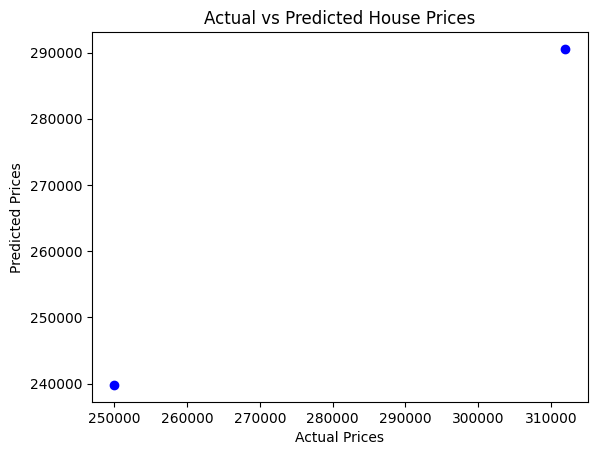

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = {
    'Area': [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700],
    'Bedrooms': [3, 3, 3, 4, 2, 3, 4, 4, 3, 3],
    'Location': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'Price': [245000, 312000, 279000, 308000, 199000, 290000, 450000, 460000, 250000, 320000]
}
df = pd.DataFrame(data)

numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df = pd.get_dummies(df, columns=['Location'], drop_first=True)

X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()